In [1]:
import numpy as np
import scipy

from simulationcomponents import *
from simulationcomponents.usergrowthclasses import *
from simulationcomponents.transactionclasses import *
from simulationcomponents.tokeneconomyclasses import *
from simulationcomponents.transactionclasses import *
from simulationcomponents.agentpoolclasses import *
from simulationcomponents.pricingclasses import *
from utils.helpers import *
from matplotlib import pyplot as plt

# Globals

In [2]:
ITERATIONS=72
HOLDING_TIME=0.1
SUPPLY=0.17*10**9

## Luxury digital art fractional marketplace

In [3]:
#Primary
usm_luxury=UserGrowth_Spaced(10,54,ITERATIONS,log_saturated_space)
tsm_luxury=TransactionManagement_Stochastic(activity_probs=np.linspace(0.25,0.1,ITERATIONS),
                                            value_dist_parameters={'loc':10000,'scale':10000/7},
                                           transactions_dist_parameters={'mu':1})

ap_luxury=AgentPool_IndependentUserGrowth(users_controller=usm_luxury,transactions_controller=tsm_luxury,currency='$')

In [4]:
#Secondary
#make the sequence of parameters
loc_param=generate_distribution_param_from_sequence('loc',np.linspace,500,750,ITERATIONS)
scale_param=generate_distribution_param_from_sequence('scale',np.linspace,500/7,750/7,ITERATIONS)
value_dist_params=merge_param_dists(loc_param,scale_param)


usm_luxury_sec=UserGrowth_Spaced(10000,327800 ,ITERATIONS,log_saturated_space)
tsm_luxury_sec=TransactionManagement_Stochastic(activity_probs=np.linspace(0.25,0.1,ITERATIONS),
                                            value_dist_parameters=value_dist_params,
                                           transactions_dist_parameters={'mu':26/12})

ap_luxury_sec=AgentPool_IndependentUserGrowth(users_controller=usm_luxury_sec,transactions_controller=tsm_luxury_sec,currency='tokenA')

## Fine physical art marketplace

In [5]:
#Primary
loc_param=generate_distribution_param_from_sequence('loc',np.linspace,2000000,5000000,ITERATIONS)
scale_param=generate_distribution_param_from_sequence('scale',np.linspace,200000/7,500000/7,ITERATIONS)
value_dist_params=merge_param_dists(loc_param,scale_param)

usm_fine=UserGrowth_Spaced(5,27,ITERATIONS,log_saturated_space)
tsm_fine=TransactionManagement_Stochastic(activity_probs=np.linspace(0.75,0.25,ITERATIONS),
                                          value_dist_parameters=value_dist_params,
                                           transactions_dist_parameters={'mu':1})

ap_fine=AgentPool_IndependentUserGrowth(users_controller=usm_fine,transactions_controller=tsm_fine,currency='tokenB')

## Own fine art


# Token economy

In [6]:
te=TokenEconomy_MultipleTokens(holding_time=HOLDING_TIME,supply=SUPPLY,tokens=['tokenA','tokenB'],initial_prices=[10,15])
te.add_agent_pools([ap_luxury,ap_luxury_sec,ap_fine])

True

In [7]:
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()

100%|███████████████████████████████████████████| 50/50 [00:01<00:00, 32.97it/s]


In [8]:
reps

,transactions_fiat,supply,holding_time,tokenA,tokenA_price,tokenB,tokenB_price,repetition_run,iteration_time
0,9.210190e+08,170000000.0,0.1,5.910903e+07,0.541776,2.198861e+07,0.541776,0,0
1,4.332341e+07,170000000.0,0.1,5.960074e+07,0.025484,2.036481e+07,0.025484,0,1
2,1.573443e+06,170000000.0,0.1,5.942237e+07,0.000926,0.000000e+00,0.000926,0,2
3,1.579276e+05,170000000.0,0.1,1.477417e+08,0.000093,2.128392e+07,0.000093,0,3
4,6.942544e+04,170000000.0,0.1,0.000000e+00,0.000041,0.000000e+00,0.000041,0,4
...,...,...,...,...,...,...,...,...,...
67,3.048922e+04,170000000.0,0.1,5.612976e+07,0.000018,1.490504e+05,0.000018,49,67
68,6.047810e+04,170000000.0,0.1,1.867228e+07,0.000036,2.927501e+07,0.000036,49,68
69,1.837550e+03,170000000.0,0.1,3.678098e+07,0.000001,1.487135e+07,0.000001,49,69
70,5.121297e+04,170000000.0,0.1,3.622930e+07,0.000030,4.928640e+06,0.000030,49,70


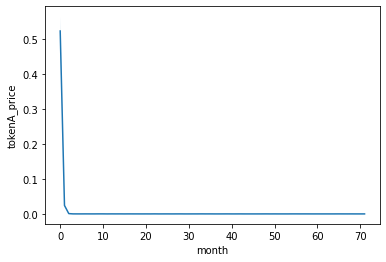

In [10]:
plot,data=meta.get_timeseries('tokenA_price')
plot

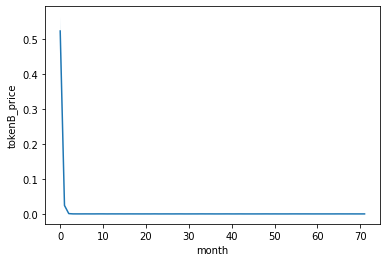

In [11]:
plot,data=meta.get_timeseries('tokenB_price')
plot

# Stochastic holding time

100%|███████████████████████████████████████████| 50/50 [00:01<00:00, 31.95it/s]


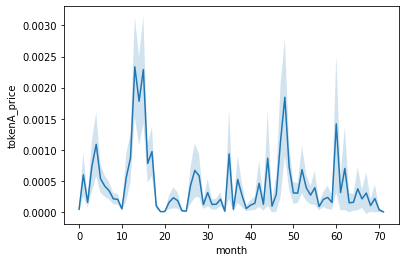

In [15]:
te=TokenEconomy_MultipleTokens(holding_time=HoldingTime_Stochastic(),supply=SUPPLY,tokens=['tokenA','tokenB'])
te.add_agent_pools([ap_luxury,ap_luxury_sec,ap_fine])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

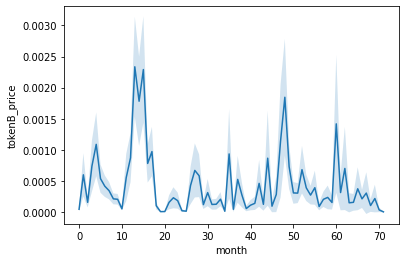

In [16]:
plot,data=meta.get_timeseries('tokenB_price')
plot

# Price plus noise

In [ ]:
te=TokenEconomy_Basic(holding_time=HoldingTime_Stochastic(),supply=SUPPLY,price_function=PriceFunction_EOE_Noise,tokens=['tokenA','tokenB'])
te.add_agent_pools([ap_luxury,ap_luxury_sec,ap_fine])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

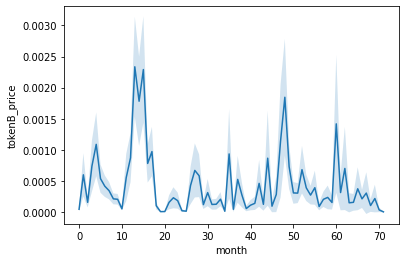

In [17]:
plot,data=meta.get_timeseries('tokenB_price')
plot

# Price plus noise plus adaptive variance

This is a special pricing mechanism which induces randomness in the price, but the variance of the noise is proportional to the price. The idea behind this is similar to https://www.investopedia.com/terms/g/garch.asp and has also been observed in the cryptocurrency markets. For example, this holds true for Bitcoin. The higher the value of bitcoin, the higher the observed volatility.

100%|███████████████████████████████████████████| 50/50 [00:01<00:00, 28.34it/s]


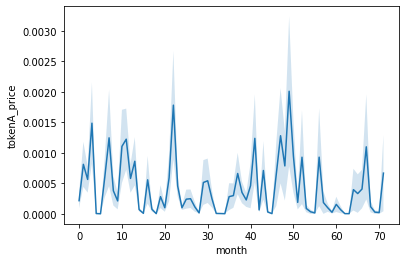

In [19]:
te=TokenEconomy_MultipleTokens(holding_time=HoldingTime_Stochastic(),supply=SUPPLY,
                      price_function=PriceFunction_EOE_AdaptiveNoise,tokens=['tokenA','tokenB'])
te.add_agent_pools([ap_luxury,ap_luxury_sec,ap_fine])
meta=TokenMetaSimulator(te)
meta.execute(iterations=ITERATIONS,repetitions=50)
reps=meta.get_data()
plot,data=meta.get_timeseries('tokenA_price')
plot

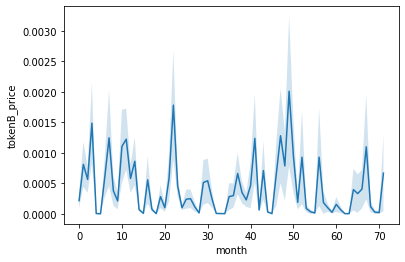

In [20]:
plot,data=meta.get_timeseries('tokenB_price')
plot